In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
#from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ccb1b7897f1bab39b6cd54104d4f380


In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
# Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
# Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
# Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
# Append the city information into city_data list.
        city_data.append({"City": city.title(),
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | sahibganj
Processing Record 9 of Set 1 | kottayam
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | sorgun
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | north platte
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | vikulovo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | senneterre
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | mar del

Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | bremervorde
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | japura
Processing Record 45 of Set 4 | muravlenko
Processing Record 46 of Set 4 | mujiayingzi
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | ruhengeri
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | benghazi
Processing Record 3 of Set 5 | maputo
Processing Record 4 of Set 5 | halalo
City not found. Skipping...
Processing Record 5 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 6 of Set 5 | te anau
Processing Record 7 of Set 5 | alpena
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 | grindavik
Processing Record 10 of Set 5 | leh
Processing Record 11 of Set 5

Processing Record 29 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 30 of Set 8 | deputatskiy
Processing Record 31 of Set 8 | derbent
Processing Record 32 of Set 8 | kieta
Processing Record 33 of Set 8 | kindia
Processing Record 34 of Set 8 | ulaangom
Processing Record 35 of Set 8 | tolaga bay
Processing Record 36 of Set 8 | timbiqui
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | craig
Processing Record 39 of Set 8 | santa maria
Processing Record 40 of Set 8 | quatre cocos
Processing Record 41 of Set 8 | tateyama
Processing Record 42 of Set 8 | looc
Processing Record 43 of Set 8 | altus
Processing Record 44 of Set 8 | bolshoy tsaryn
City not found. Skipping...
Processing Record 45 of Set 8 | amapa
Processing Record 46 of Set 8 | bosaso
Processing Record 47 of Set 8 | waitara
Processing Record 48 of Set 8 | gunnedah
Processing Record 49 of Set 8 | mumford
Processing Record 50 of Set 8 | talnakh
Processing Record 1 of Set 9 | ulaanbaatar
P

City not found. Skipping...
Processing Record 16 of Set 12 | tingo maria
Processing Record 17 of Set 12 | marienburg
Processing Record 18 of Set 12 | bemidji
Processing Record 19 of Set 12 | kloulklubed
Processing Record 20 of Set 12 | kaduy
Processing Record 21 of Set 12 | sinnamary
Processing Record 22 of Set 12 | czluchow
Processing Record 23 of Set 12 | stornoway
Processing Record 24 of Set 12 | gravdal
Processing Record 25 of Set 12 | marsa matruh
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | ambon
Processing Record 28 of Set 12 | back mountain
Processing Record 29 of Set 12 | saint george
Processing Record 30 of Set 12 | yingcheng
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | acari
Processing Record 33 of Set 12 | olinda
Processing Record 34 of Set 12 | hobyo
Processing Record 35 of Set 12 | beira
Processing Record 36 of Set 12 | tautira
Processing Record 37 of Set 12 | muzhi
Processing Record 38 of Set 12 | cafarnaum
Processing

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,46.38,82,34,7.90,NZ,2021-02-04 18:28:13
1,Chuy,-33.6971,-53.4616,73.56,61,85,19.10,UY,2021-02-04 18:28:31
2,Busselton,-33.6500,115.3333,54.00,75,0,12.19,AU,2021-02-04 18:28:31
3,Ilulissat,69.2167,-51.1000,-0.40,32,1,11.50,GL,2021-02-04 18:28:27
4,Geraldton,-28.7667,114.6000,77.00,31,40,19.57,AU,2021-02-04 18:28:31
5,Husavik,66.0449,-17.3389,26.60,74,20,6.91,IS,2021-02-04 18:28:32
6,Thinadhoo,0.5333,72.9333,82.56,76,38,11.23,MV,2021-02-04 18:28:32
7,Sahibganj,25.2500,87.6500,61.97,45,0,3.40,IN,2021-02-04 18:28:32
8,Kottayam,9.5833,76.5167,77.00,78,13,1.95,IN,2021-02-04 18:28:32
9,Jamestown,42.0970,-79.2353,33.80,51,1,5.75,US,2021-02-04 18:28:32


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-02-04 18:28:13,-46.6000,168.3333,46.38,82,34,7.90
1,Chuy,UY,2021-02-04 18:28:31,-33.6971,-53.4616,73.56,61,85,19.10
2,Busselton,AU,2021-02-04 18:28:31,-33.6500,115.3333,54.00,75,0,12.19
3,Ilulissat,GL,2021-02-04 18:28:27,69.2167,-51.1000,-0.40,32,1,11.50
4,Geraldton,AU,2021-02-04 18:28:31,-28.7667,114.6000,77.00,31,40,19.57
...,...,...,...,...,...,...,...,...,...
576,Riyadh,SA,2021-02-04 18:26:04,24.6877,46.7219,69.80,24,0,4.61
577,Gizo,SB,2021-02-04 18:29:59,-8.1030,156.8419,80.96,76,100,8.50
578,Aswan,EG,2021-02-04 18:29:59,24.0934,32.9070,63.30,40,0,9.60
579,Talcahuano,CL,2021-02-04 18:29:59,-36.7167,-73.1167,62.60,82,75,18.41


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
#MIDDLE SCHOOL STEM PROJECT PLOTS

In [11]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

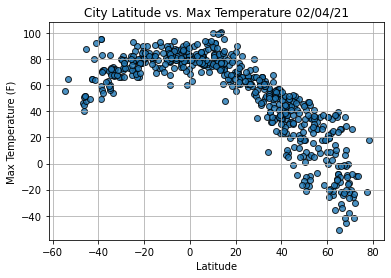

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

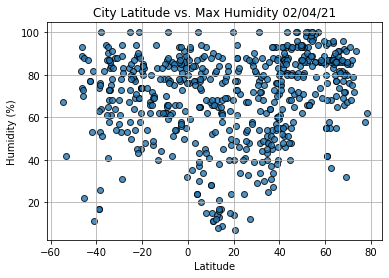

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

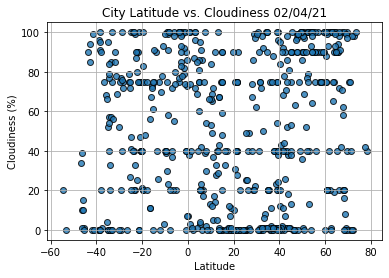

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

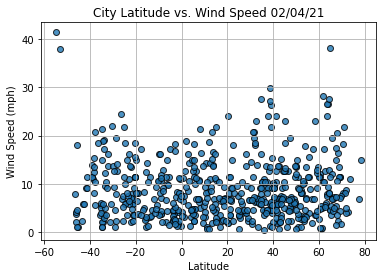

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()